# Adding content

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

For simplicity, this section mainly uses `pyplot` plotting functions. However, the same applies to the corresponding `Axes` methods.

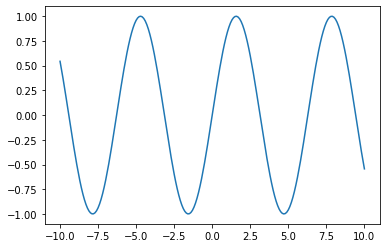

In [2]:
x = np.linspace(-10, 10, 201)
y = np.sin(x)

fig, ax = plt.subplots()
ax.plot(x, y)

## Explicit styling with color, marker and linestyle

`plt.plot()` draws lines and/or markers at the given points

### Styling with format strings

Inspired by MATLAB.

A format string consists of a part for color, marker and line:

~~~
fmt = '[marker][line][color]'
~~~

https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html (scroll down)

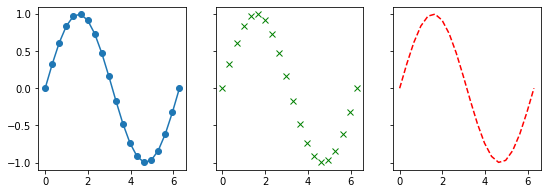

In [3]:
x = np.linspace(0, 2*np.pi, 20)
y = np.sin(x)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
ax1.plot(x, y, 'o-')
ax2.plot(x, y, 'gx')
ax3.plot(x, y, 'r--')

### Task
Create the same plot but using keyword arguments `marker`, `linestyle` and `color` instead of the format string.

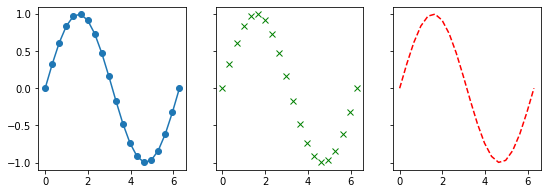

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
ax1.plot(x, y, marker='o')
ax2.plot(x, y, marker='x', linestyle='none', color='green')
ax3.plot(x, y, marker='', linestyle='--', color='red')

### Notes

- Format strings are a handy shortcut for customization
- They offer only a subset of the styling capabilities of keyword arguments
- Format strings define the style completely, keyword arguments only modify single aspects.  
  Compare `plot(x, y, 'x')` vs `plot(x, y, marker='x')`.

### Default color cycle

Matplotlib automatically changes the color if you plot multiple curves.

More on that later...

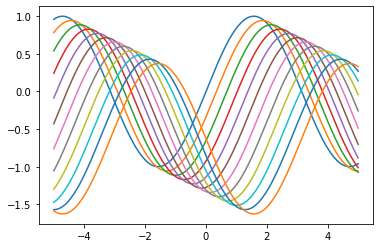

In [5]:
x = np.linspace(-5, 5, 201)
for dx in np.linspace(0, np.pi, 12):
    plt.plot(x, np.sin(x - dx) - 0.2 * dx)

## Colors

There are various ways to specify colors:

https://matplotlib.org/stable/tutorials/colors/colors.html

https://matplotlib.org/stable/gallery/color/named_colors.html

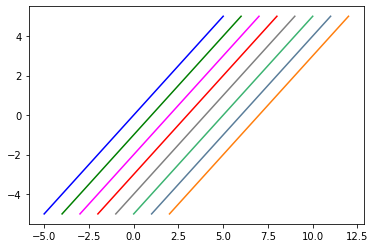

In [6]:
plt.plot(x, x, color='b')
plt.plot(x + 1, x, color='green')
plt.plot(x + 2, x, color='#ff00ff')
plt.plot(x + 3, x, color=(1, 0, 0))
plt.plot(x + 4, x, color='0.5')
plt.plot(x + 5, x, color='mediumseagreen')
plt.plot(x + 6, x, color='xkcd:steel blue')
plt.plot(x + 7, x, color='C1')

`CN` color notation is in particular useful for relating additional plot elements with the data.

Text(2, 0, 'second color')

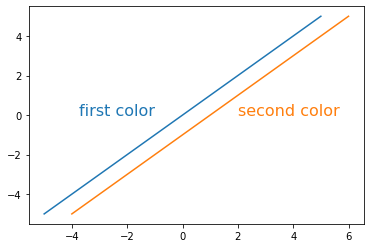

In [19]:
plt.plot(x, x)
plt.plot(x+1, x)

plt.text(-1, 0, 'first color', color='C0', fontsize=16, horizontalalignment='right')
plt.text(2, 0, 'second color', color='C1', fontsize=16)

## Return values

Most of the plotting functions have a return value.

Often you don't need it. But it's good to know, and sometimes handy.

The returned objects are Artists that define elements in the plot such as lines, etc. See the [Returns section in the docs](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.plot.html) for details.

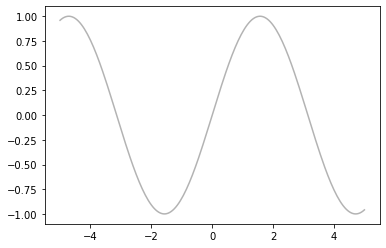

In [9]:
lines = plt.plot(x, np.sin(x))
print(lines)
lines[0].set_color('0.7')

**Note:** `plot()` returns a list of `Line2D` because it can be used in a MATLAB style (not quite recommended because it can get messy)

**Hint:** If you have a one-element list, you can use tuple-unpacking to directly store the element in a variable.

[<matplotlib.lines.Line2D object at 0x7ff6815a83d0>, <matplotlib.lines.Line2D object at 0x7ff6815a85d0>]


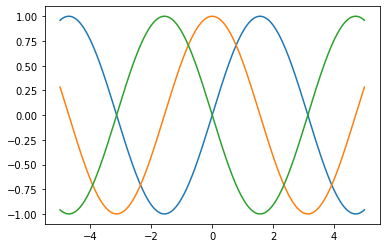

In [10]:
lines = plt.plot(x, np.sin(x), x, np.cos(x))
print(lines)

# 1-element tuple unpacking
line, = plt.plot(x, -np.sin(x))

## `data` parameter

Alternative way for specifying the data for objects that support index-access by names (dicts, structured numpy arrays, pandas DataFrames, ...)

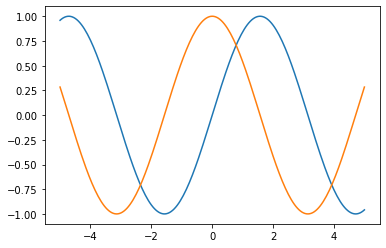

In [20]:
data = {'x': x, 'sine': np.sin(x), 'cosine': np.cos(x)}

plt.plot(data['x'], data['sine'])
plt.plot('x', 'cosine', data=data)

## Legend

- By default, only elements that have labels are added to the legend.
- The legend is placed in a best position.
- The defaults can be overwritten by providing additional parameters to `legend()`.

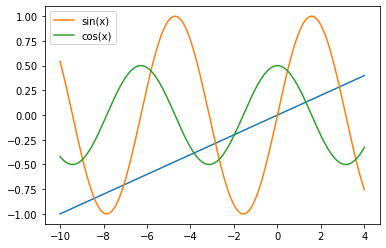

In [10]:
x = np.linspace(-10, 4, 201)
line, = plt.plot(x, 0.1*x)
plt.plot(x, np.sin(x), label='sin(x)')
plt.plot(x, 0.5*np.cos(x), label='cos(x)')
#line.set_label('x')
plt.legend()

#### Explicitly defining legend content

The automatic label-based content detection for a legend is usually sufficient. However, sometimes you might want to add artists to a legend, that are not part of the axes.

In that case, you can explicitly pass lists of Artists and labels to `legend()`.

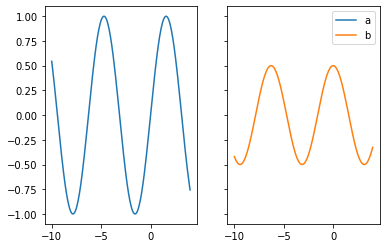

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
line1, = ax1.plot(x, np.sin(x))
line2, = ax2.plot(x, 0.5 * np.cos(x), 'C1')

ax2.legend([line1, line2], ['a', 'b'])

## Categorical bar plots

<BarContainer object of 4 artists>

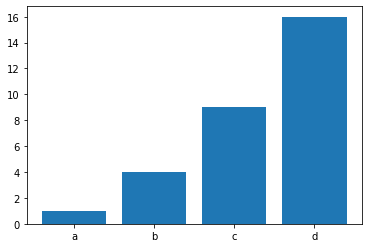

In [26]:
# outdated: pass tick_labels as keyword arg
x = np.arange(1, 5)
labels = ['a', 'b', 'c', 'd']
plt.bar(x, x**2, tick_label=labels)

<BarContainer object of 4 artists>

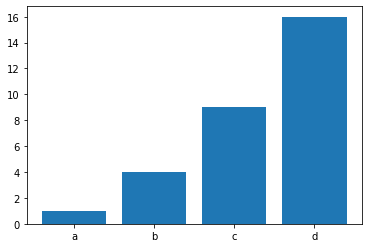

In [27]:
# recommended: pass labels as x
labels = ['a', 'b', 'c', 'd']
plt.bar(labels, x**2)

### Example: Multiple bars

It's a pain, because you have to position and size them manually.

We'll learn better ways later using pandas later.

<BarContainer object of 4 artists>

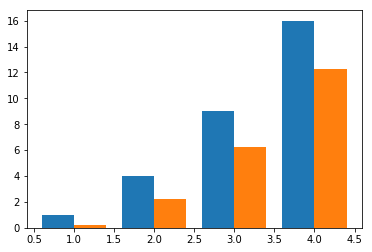

In [40]:
plt.bar(x-0.2, x**2, width=0.4)
plt.bar(x+0.2, (0.5-x)**2, width=0.4)

## Other plotting functions

See

- https://matplotlib.org/stable/plot_types/index.html
- https://matplotlib.org/stable/api/axes_api.html